In [39]:
import csv
import numpy as np
import pandas as pd
import json
import matplotlib as plt

In [6]:
source = './data/2019-combined.csv'

In [11]:
df = pd.read_csv(source)
print(df.head())

        State  Education Budget  Unemployment Rate  Population Estimate  \
0     Alabama      2.775338e+09                3.2              4903185   
1      Alaska      4.005232e+08                5.6               731545   
2     Arizona      5.143402e+09                4.8              7278717   
3    Arkansas      1.350409e+09                3.5              3017804   
4  California      1.721222e+10                4.1             39512223   

   SNAPS household_participants  SNAPS individual_participants  SNAPS cost  \
0                        315551                         667043  1032064886   
1                         35493                          78932   171091672   
2                        345106                         736883  1146712214   
3                        159231                         354917   460333605   
4                       1803402                        3529470  5977281299   

   SNAPS cost_per_person  SNAPS cost_per_household  
0                 272.56   

In [14]:
df['Education Budget by Population'] = df['Education Budget'] / df['Population Estimate']
df['SNAPS Cost by Population'] = df['SNAPS cost'] / df['Population Estimate']


<Axes: title={'center': 'Education Budget and SNAPS Cost by Population (2019)'}, xlabel='Education Budget by Population', ylabel='SNAPS Cost by Population'>

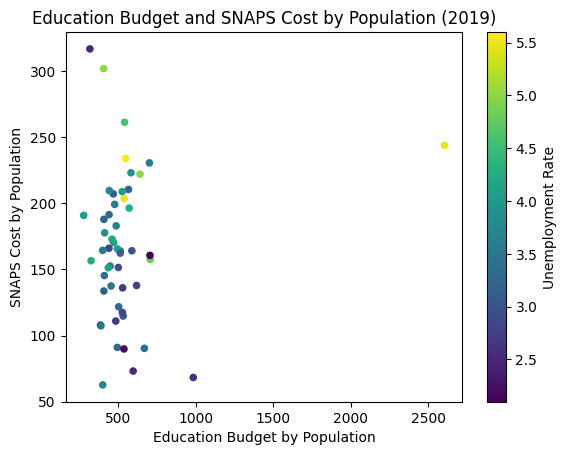

In [23]:
df.plot.scatter('Education Budget by Population', 'SNAPS Cost by Population', c='Unemployment Rate', colormap='viridis', title="Education Budget and SNAPS Cost by Population (2019)")

<Axes: title={'center': 'Population vs SNAPS Money Spent by State (2019)'}, xlabel='Population Estimate', ylabel='SNAPS cost'>

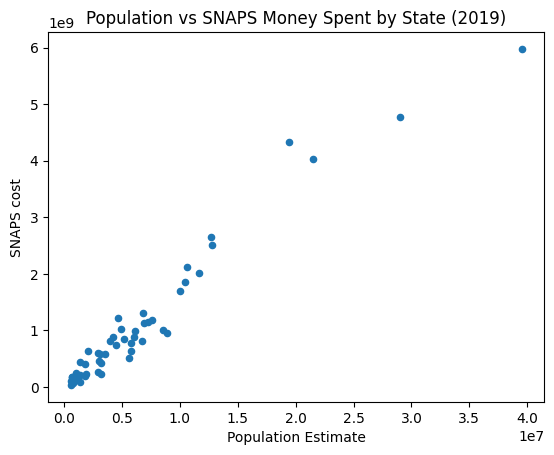

In [26]:
df.plot.scatter('Population Estimate', 'SNAPS cost', title="Population vs SNAPS Money Spent by State (2019)")

<Axes: xlabel='State'>

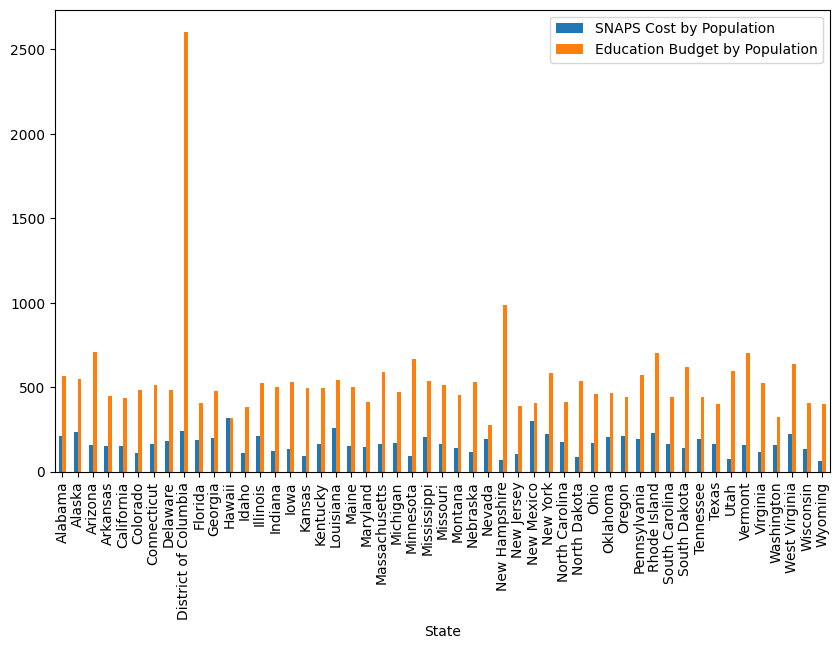

In [41]:
df2 = df[['State', 'SNAPS Cost by Population', 'Education Budget by Population']].set_index("State")
df2.plot.bar(figsize=(10,6))  #('State', 'SNAPS Cost by Population', 'Education Budget by Population', rot=0)

# DOING ANALYSIS ACROSS DIFFERENT YEARS NOW

In [45]:
years = ['2015', '2016', '2017', '2018', '2019']
data = {}

In [82]:
for year in years:
    source = f'./data/{year}-combined.csv'
    combined = pd.read_csv(source)
    combined_dict =  combined.to_dict('records')
    data[year] = combined_dict.copy()

In [83]:
def gather_data(state, data):
    unemployment, education, snaps, pop = [], [], [], []
    for year in years:
        for record in data[year]:
            if state == record["State"]:
                unemployment.append(record["Unemployment Rate"])
                education.append(record["Education Budget"])
                snaps.append(record["SNAPS cost"])
                pop.append(record["Population Estimate"])
                
    return {"Unemployment Rate": unemployment, "Education Budget": education, "SNAPS cost": snaps, "Population Estimate": pop}

In [84]:
va_data = gather_data("Virginia", data)

2015
2016
2017
2018
2019


In [85]:
print(va_data)

{'Unemployment Rate': [4.4, 4.1, 3.8, 3.0, 2.8], 'Education Budget': [4286211235.0, 4352946774.0, 4404295843.0, 4526294721.0, 4493669761.0], 'SNAPS cost': [1230788073, 1169412644, 1115536652, 1051800978, 1002380166], 'Population Estimate': [8361808, 8410106, 8463587, 8501286, 8535519]}


Text(0.5, 0.98, 'Virginia Federal Spending over Recent Years')

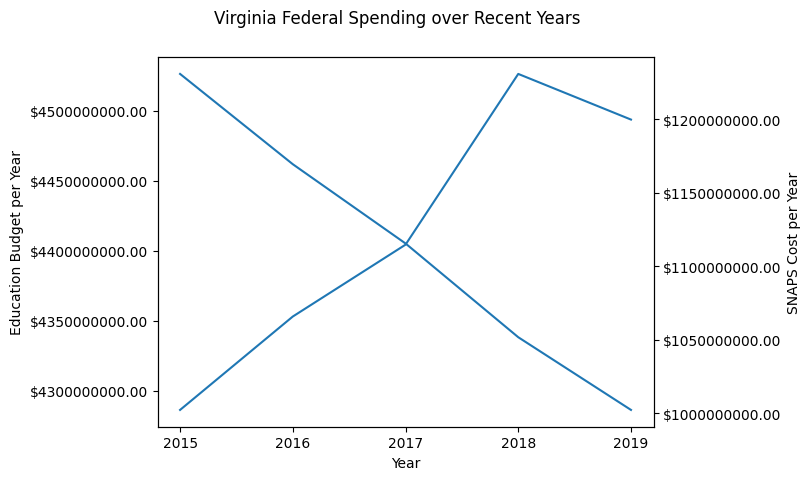

In [93]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  
#ax1.ticklabel_format(useOffset=False, style = 'plain')
ax1.yaxis.set_major_formatter('${x:1.2f}')
#ax2.ticklabel_format(useOffset=False, style = 'plain')
ax2.yaxis.set_major_formatter('${x:1.2f}')

ax1.plot(years, va_data['Education Budget'])
ax2.plot(years, va_data['SNAPS cost'])

ax1.set_xlabel("Year")
ax1.set_ylabel("Education Budget per Year")
ax2.set_ylabel("SNAPS Cost per Year")

fig.suptitle('Virginia Federal Spending over Recent Years')